### Analysing cooperativity in an equilibrium model of dimerisation and membrane association

Context:
- Performing 'virtual rundowns' on the equilibrium model described in the paper
- Quantifying nonlinearity as a deviation from slope=1 on a log-log plot

Results:
- Cooperativity occurs in intermediate dimerisation regimes
- Corresponds to models where molecules are dimeric at the membrane and monomeric in the cytoplasm

Dependencies:
- See _DimerModelSolving/SolveModel.ipynb_ to see how the model was solved analytically

In [1]:
import os

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

from src import log_molar_to_micromolar, minor_ticks

%matplotlib inline

mpl.rcParams["figure.dpi"] = 150

if not os.path.exists("Figs"):
    os.mkdir("Figs")

### Solving the model

#### Part 1: cytoplasm vs membrane

See Solve notebook.
Model 2 is the applicable one (others give nonsensical answers)

In [2]:
def model1(ka, km, alpha, d):
    return (
        -(alpha**2) * km**3
        + alpha**2 * km**2
        + 4 * alpha * d * ka * km**2
        - alpha
        * km**2
        * np.sqrt(
            alpha**2 * km**2
            + 8 * alpha * d * ka * km**2
            + 2 * alpha * km
            + 8 * d * ka
            + 1
        )
        - alpha * km**2
        + alpha
        * km
        * np.sqrt(
            alpha**2 * km**2
            + 8 * alpha * d * ka * km**2
            + 2 * alpha * km
            + 8 * d * ka
            + 1
        )
        + alpha * km
        + 4 * d * ka
    ) / (4 * ka * (alpha**2 * km**4 + 2 * alpha * km**2 + 1))


def model2(ka, km, alpha, d):
    return (
        -(alpha**2) * km**3
        + alpha**2 * km**2
        + 4 * alpha * d * ka * km**2
        + alpha
        * km**2
        * np.sqrt(
            alpha**2 * km**2
            + 8 * alpha * d * ka * km**2
            + 2 * alpha * km
            + 8 * d * ka
            + 1
        )
        - alpha * km**2
        - alpha
        * km
        * np.sqrt(
            alpha**2 * km**2
            + 8 * alpha * d * ka * km**2
            + 2 * alpha * km
            + 8 * d * ka
            + 1
        )
        + alpha * km
        + 4 * d * ka
    ) / (4 * ka * (alpha**2 * km**4 + 2 * alpha * km**2 + 1))


def model3(ka, km, alpha, d):
    return (
        alpha**2 * km**3
        + alpha**2 * km**2
        + 4 * alpha * d * ka * km**2
        - alpha
        * km**2
        * np.sqrt(
            alpha**2 * km**2
            + 8 * alpha * d * ka * km**2
            - 2 * alpha * km
            + 8 * d * ka
            + 1
        )
        - alpha * km**2
        - alpha
        * km
        * np.sqrt(
            alpha**2 * km**2
            + 8 * alpha * d * ka * km**2
            - 2 * alpha * km
            + 8 * d * ka
            + 1
        )
        - alpha * km
        + 4 * d * ka
    ) / (4 * ka * (alpha**2 * km**4 + 2 * alpha * km**2 + 1))


def model4(ka, km, alpha, d):
    return (
        alpha**2 * km**3
        + alpha**2 * km**2
        + 4 * alpha * d * ka * km**2
        + alpha
        * km**2
        * np.sqrt(
            alpha**2 * km**2
            + 8 * alpha * d * ka * km**2
            - 2 * alpha * km
            + 8 * d * ka
            + 1
        )
        - alpha * km**2
        + alpha
        * km
        * np.sqrt(
            alpha**2 * km**2
            + 8 * alpha * d * ka * km**2
            - 2 * alpha * km
            + 8 * d * ka
            + 1
        )
        - alpha * km
        + 4 * d * ka
    ) / (4 * ka * (alpha**2 * km**4 + 2 * alpha * km**2 + 1))

#### Part 2: Monomer vs dimer

In [3]:
def dimerisation(ka, tot):
    # Takes the total concentration, and returns the monomer concentration
    mon = (np.sqrt(8 * tot * ka + 1) - 1) / (4 * ka)
    return mon

### Parameters

In [4]:
D = 0.005451  # molecule diameter (um) (estimated based on mw)
svr = 0.174  # surface area to volume ratio (Goehring 2011)
Km = 2.5  # log 10 of default membrane binding constant
dos_max = 1.04e-8 / (
    1 - 0.62
)  # maximum dosage to run down from (based on Gross 2018 and my estimates of membrane fraction)
print(dos_max)

2.736842105263158e-08


### Rundowns: log transformed

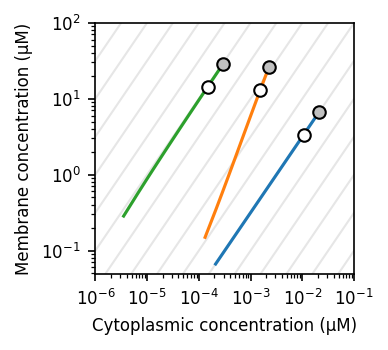

In [5]:
dosages = np.linspace(dos_max / 100, dos_max, 100)
select_energies = [2.5, 7.5, 12.5]

fig, ax = plt.subplots()

# Plot major lines
for d in select_energies:
    cyt = model2(10**d, 10**Km, alpha=svr * D, d=dosages)
    mem = (dosages - cyt) / (svr * D)
    ax.plot(np.log10(cyt), np.log10(mem))

# Plot full dosage points
for d in select_energies:
    cyt = model2(10**d, 10**Km, alpha=svr * D, d=dosages[-1])
    mem = (dosages[-1] - cyt) / (svr * D)
    ax.scatter(np.log10(cyt), np.log10(mem), c="silver", edgecolors="k", zorder=10)

# Plot half dosage points
for d in select_energies:
    cyt = model2(10**d, 10**Km, alpha=svr * D, d=dosages[-1] / 2)
    mem = (dosages[-1] / 2 - cyt) / (svr * D)
    ax.scatter(np.log10(cyt), np.log10(mem), c="w", edgecolors="k", zorder=10)

# Plot grid lines
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for i in np.arange(-10, 10, 0.5):
    ax.plot([-20, 0], [i - 10, i + 10], c="0.9", zorder=-100, linewidth=1)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_yticks([i for i in ax.get_yticks() if i % 1 == 0])
ax.set_xticks([i for i in ax.get_xticks() if i % 1 == 0])
ax.set_xlabel("Cytoplasmic concentration (µM)", fontsize=8)
ax.set_ylabel("Membrane concentration (µM)", fontsize=8)
ax.xaxis.set_major_formatter(log_molar_to_micromolar)
ax.yaxis.set_major_formatter(log_molar_to_micromolar)
ax.tick_params(axis="both", labelsize=8)
minor_ticks(ax)
fig.set_size_inches(2.5, 2.5)
fig.subplots_adjust(bottom=0.21, left=0.21)
fig.savefig("Figs/rundowns_log.png", transparent=True, dpi=600)

### Effective exponent

In [6]:
resolution = 100
mem_energies_ = np.linspace(0, 5, resolution)
dim_energies_ = np.linspace(0, 15, resolution)
X, Y = np.meshgrid(mem_energies_, dim_energies_)

cyts = np.zeros([len(dosages), 100, 100])
mems = np.zeros([len(dosages), 100, 100])
for i, d in enumerate(dosages):
    cyts[i, :, :] = model2(10**Y, 10**X, alpha=svr * D, d=d)
    mems[i, :, :] = (d - cyts[i, :, :]) / (svr * D)

res = np.zeros([100, 100])
for i in range(100):
    for j in range(100):
        x = cyts[:, i, j]
        y = mems[:, i, j]
        res[i, j] = np.polyfit(np.log10(x), np.log10(y), 1)[0]

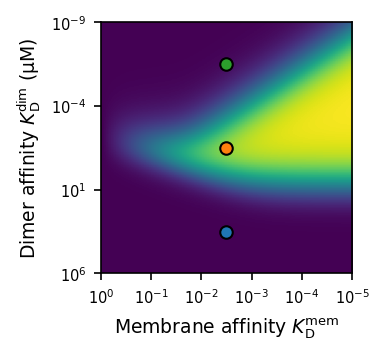

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(2.5, 2.5)
extent = (
    min(mem_energies_),
    max(mem_energies_),
    min(dim_energies_),
    max(dim_energies_),
)
aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])
ax.imshow(
    res, origin="lower", extent=extent, aspect=aspect, cmap="viridis", vmin=1, vmax=2
)

for y in select_energies:
    ax.scatter(2.5, y, edgecolors="k")


@FuncFormatter
def log_ka_to_kd(x, pos):
    return r"$10^{%d}$" % (-x)


@FuncFormatter
def log_ka_to_kd_molar_to_micromolar(x, pos):
    return r"$10^{%d}$" % (-x + 6)


ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel("Membrane affinity " + r"$K\mathrm{_D^{mem}}$", fontsize=9)
ax.set_ylabel("Dimer affinity " + r"$K\mathrm{_D^{dim}}$" + " (µM)", fontsize=9)
ax.xaxis.set_major_formatter(log_ka_to_kd)
ax.yaxis.set_major_formatter(log_ka_to_kd_molar_to_micromolar)
ax.tick_params(axis="both", labelsize=7)
fig.subplots_adjust(bottom=0.21, left=0.21)
fig.savefig("Figs/exponents.png", transparent=True, dpi=600)

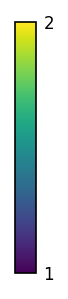

In [8]:
fig, ax = plt.subplots(figsize=(0.6, 2))
fig.set_size_inches(0.8, 2.5)
fig.subplots_adjust(bottom=0.21, right=0.3)
cbar = matplotlib.colorbar.ColorbarBase(ax, cmap=plt.get_cmap("viridis"), ticks=[0, 1])
cbar.ax.set_yticklabels(["1", "2"])
cbar.ax.tick_params(size=0, labelsize=8)
fig.savefig("Figs/exponents_cbar.png", transparent=True, dpi=600)

### Local concentration vs dimerisation

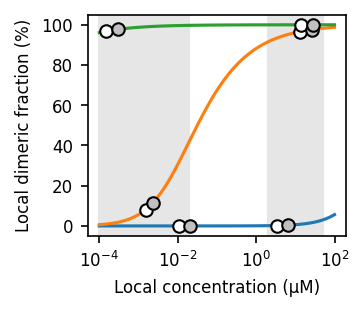

In [9]:
fig, ax = plt.subplots()
local_concentrations = np.linspace(-10, -4, 100)

# Major lines
for d in select_energies:
    # Dimer titration curve
    mon = dimerisation(ka=10**d, tot=10**local_concentrations)
    dim_frac = 100 * ((10**local_concentrations) - mon) / (10**local_concentrations)
    ax.plot(local_concentrations, dim_frac)

    # Cytoplasmic and membrane concentrations - full dosage
    cyt = model2(10**d, 10**Km, alpha=svr * D, d=dos_max)
    mem = (dos_max - cyt) / (svr * D)

    # Cytoplasmic and membrane dimerisation - full dosage
    cyt_mon = dimerisation(ka=10**d, tot=cyt)
    mem_mon = dimerisation(ka=10**d, tot=mem)
    cyt_dim_frac = 100 * (cyt - cyt_mon) / cyt
    mem_dim_frac = 100 * (mem - mem_mon) / mem
    ax.scatter(np.log10(cyt), cyt_dim_frac, zorder=10, c="silver", edgecolors="k")
    ax.scatter(np.log10(mem), mem_dim_frac, zorder=10, c="silver", edgecolors="k")

    # Cytoplasmic and membrane concentrations - half dosage
    cyt = model2(10**d, 10**Km, alpha=svr * D, d=dos_max / 2)
    mem = ((dos_max / 2) - cyt) / (svr * D)

    # Cytoplasmic and membrane dimerisation - half dosage
    cyt_mon = dimerisation(ka=10**d, tot=cyt)
    mem_mon = dimerisation(ka=10**d, tot=mem)
    cyt_dim_frac = 100 * (cyt - cyt_mon) / cyt
    mem_dim_frac = 100 * (mem - mem_mon) / mem
    ax.scatter(np.log10(cyt), cyt_dim_frac, zorder=5, c="w", edgecolors="k")
    ax.scatter(np.log10(mem), mem_dim_frac, zorder=5, c="w", edgecolors="k")

# Shaded regions
ax.axvspan(-10.0, -7.7, color="0.9")
ax.axvspan(-5.7, -4.3, color="0.9")

ax.tick_params(axis="both", labelsize=8)
ax.set_xlabel("Local concentration (µM)", fontsize=8)
ax.set_ylabel("Local dimeric fraction (%)", fontsize=8)
ax.xaxis.set_major_formatter(log_molar_to_micromolar)
# minor_ticks(ax, y=False)

fig.set_size_inches(2.5, 2.5)
fig.subplots_adjust(bottom=0.21, left=0.21, top=0.8)
fig.savefig("Figs/dimerisation.png", dpi=600, transparent=True)